# Parse PATH monthly ridership PDF
```bash
papermill -p year $year [-p last_month $last_month] monthly.ipynb out/monthly-$year.ipynb
```

In [1]:
from utz import *
import json
from tabula import read_pdf

In [2]:
n = now()
cur_year = n.year
cur_month = n.month
cur_year, cur_month

(2024, 4)

Papermill parameters:

In [3]:
year = None
last_month = None
template = None

In [4]:
# Parameters
year = 2024
last_month = 1
template = "2023-PATH-Monthly-Ridership-Report.tabula-template.json"


In [5]:
if year is None:
    year = cur_year

if last_month is None:
    if year == cur_year:
        last_moonth = 1
    else:
        last_month = 12

if template is None:
    template = 'PATH-Monthly-Ridership-Report.json'

In [6]:
pdf = f'data/{year}-PATH-Monthly-Ridership-Report.pdf'
pdf

'data/2024-PATH-Monthly-Ridership-Report.pdf'

In [7]:
with open(f'templates/{template}', 'r') as f:
    rects = json.load(f)
rects

[{'page': 1,
  'extraction_method': 'guess',
  'x1': 54.315,
  'x2': 577.575,
  'y1': 116.00001000000002,
  'y2': 238.40001,
  'width': 523.26,
  'height': 122.4},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 253.000035,
  'y2': 401.41003500000005,
  'width': 519.4350000000001,
  'height': 148.41},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 474.999975,
  'y2': 592.809975,
  'width': 519.4350000000001,
  'height': 117.81},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 56.61,
  'x2': 578.34,
  'y1': 611.000145,
  'y2': 753.290145,
  'width': 521.73,
  'height': 142.29}]

In [8]:
area = [ [ r[k] for k in [ 'y1', 'x1', 'y2', 'x2' ] ] for r in rects ]
area

[[116.00001000000002, 54.315, 238.40001, 577.575],
 [253.000035, 58.14, 401.41003500000005, 577.575],
 [474.999975, 58.14, 592.809975, 577.575],
 [611.000145, 56.61, 753.290145, 578.34]]

In [9]:
tables = {
    month: read_pdf(
        pdf,
        pages=month,
        area=area,
        pandas_options={'header': None},
        stream=True,
    ) 
    for month in range(1, last_month + 1)
}

tables

{1: [                    0          1       2       3       4       5
  0  Christopher Street     86,831   3,147   2,511   1,784   1,784
  1          9th Street     75,977   2,792   2,108   1,401   1,651
  2         14th Street    127,321   4,834   3,037   2,180   2,472
  3         23rd Street    122,336   5,033   1,964   1,287   1,817
  4         33rd Street    500,254  19,543   9,702   6,865  11,787
  5     UPTOWN SUBTOTAL    912,719  35,350  19,322  13,517  19,510
  6                 WTC    922,430  37,278  15,316  11,296  16,569
  7   NEW YORK SUBTOTAL  1,835,149  72,628  34,638  24,813  36,079,
                       0          1        2       3       4       5
  0               Newark    344,156   14,267   5,102   3,413   5,244
  1             Harrison    130,445    5,417   2,086   1,154   1,862
  2       Journal Square    474,171   18,174  10,822   7,634   9,348
  3         Grove Street    366,378   14,545   7,620   4,638   5,955
  4       Exchange Place    248,376   10,112   4

In [10]:
cols1 = [ 'station', 'total', 'avg weekday', 'avg sat', 'avg sun', 'avg holiday' ]
cols2 = [ 'station', 'avg daily', 'total weekday', 'total sat', 'total sun', 'total holiday' ]

In [11]:
for k, v in tables.items():
    n = len(v)
    msg = f'Pg {k}: {n} tables'
    if n == 4:
        print(msg)
    else:
        err(msg)
len(tables)

Pg 1: 4 tables


1

In [12]:
avgs = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[:2]
])
avgs

,0,1,2,3,4,5,date
0,Christopher Street,"86,831","3,147","2,511","1,784","1,784",2024-01-01
1,9th Street,"75,977","2,792","2,108","1,401","1,651",2024-01-01
2,14th Street,"127,321","4,834","3,037","2,180","2,472",2024-01-01
3,23rd Street,"122,336","5,033","1,964","1,287","1,817",2024-01-01
4,33rd Street,"500,254","19,543","9,702","6,865","11,787",2024-01-01
5,UPTOWN SUBTOTAL,"912,719","35,350","19,322","13,517","19,510",2024-01-01
6,WTC,"922,430","37,278","15,316","11,296","16,569",2024-01-01
7,NEW YORK SUBTOTAL,"1,835,149","72,628","34,638","24,813","36,079",2024-01-01
0,Newark,"344,156","14,267","5,102","3,413","5,244",2024-01-01
1,Harrison,"130,445","5,417","2,086","1,154","1,862",2024-01-01


In [13]:
avgs.columns = cols1 + ['month']
avgs = avgs.assign(**{
    k: avgs[k].astype(str).str.replace(',', '').astype(int)
    for k in cols1[1:]
})
avgs

,station,total,avg weekday,avg sat,avg sun,avg holiday,month
0,Christopher Street,86831,3147,2511,1784,1784,2024-01-01
1,9th Street,75977,2792,2108,1401,1651,2024-01-01
2,14th Street,127321,4834,3037,2180,2472,2024-01-01
3,23rd Street,122336,5033,1964,1287,1817,2024-01-01
4,33rd Street,500254,19543,9702,6865,11787,2024-01-01
5,UPTOWN SUBTOTAL,912719,35350,19322,13517,19510,2024-01-01
6,WTC,922430,37278,15316,11296,16569,2024-01-01
7,NEW YORK SUBTOTAL,1835149,72628,34638,24813,36079,2024-01-01
0,Newark,344156,14267,5102,3413,5244,2024-01-01
1,Harrison,130445,5417,2086,1154,1862,2024-01-01


In [14]:
avgs.isna().sum(axis=0)

station        0
total          0
avg weekday    0
avg sat        0
avg sun        0
avg holiday    0
month          0
dtype: int64

In [15]:
avgs.dtypes

station                object
total                   int64
avg weekday             int64
avg sat                 int64
avg sun                 int64
avg holiday             int64
month          datetime64[ns]
dtype: object

In [16]:
sums = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[2:]
])
sums.columns = cols2 + ['month']
sums = sums.assign(**{
    k: sums[k].astype(str).str.replace(',', '').astype(int)
    for k in cols2[1:]
})
sums

,station,avg daily,total weekday,total sat,total sun,total holiday,month
0,Christopher Street,2801,66085,10043,7136,3567,2024-01-01
1,9th Street,2451,58641,8433,5602,3301,2024-01-01
2,14th Street,4107,101507,12149,8721,4944,2024-01-01
3,23rd Street,3946,105700,7855,5147,3634,2024-01-01
4,33rd Street,16137,410413,38806,27461,23574,2024-01-01
5,UPTOWN SUBTOTAL,29443,742346,77286,54067,39020,2024-01-01
6,WTC,29756,782844,61264,45185,33137,2024-01-01
7,NEW YORK SUBTOTAL,59198,1525190,138550,99252,72157,2024-01-01
0,Newark,11102,299611,20406,13651,10488,2024-01-01
1,Harrison,4208,113764,8344,4614,3723,2024-01-01


In [17]:
sums.isna().sum(axis=0)

station          0
avg daily        0
total weekday    0
total sat        0
total sun        0
total holiday    0
month            0
dtype: int64

In [18]:
sums.dtypes

station                  object
avg daily                 int64
total weekday             int64
total sat                 int64
total sun                 int64
total holiday             int64
month            datetime64[ns]
dtype: object

In [19]:
df = sxs(
    avgs.set_index(['month', 'station']),
    sums.set_index(['month', 'station']),
)
df = df[[cols2[1]] + cols1[2:] + [cols1[1]] + cols2[2:]]
df

avg daily  avg weekday  avg sat  avg sun  \
month      station                                                         
2024-01-01 Christopher Street        2801         3147     2511     1784   
           9th Street                2451         2792     2108     1401   
           14th Street               4107         4834     3037     2180   
           23rd Street               3946         5033     1964     1287   
           33rd Street              16137        19543     9702     6865   
           UPTOWN SUBTOTAL          29443        35350    19322    13517   
           WTC                      29756        37278    15316    11296   
           NEW YORK SUBTOTAL        59198        72628    34638    24813   
           Newark                   11102        14267     5102     3413   
           Harrison                  4208         5417     2086     1154   
           Journal Square           15296        18174    10822     7634   
           Grove Street             11819        14545     7620     4638   
           Exchange Place            8012        10112     4418     2761   
           Newport                   8463        10678     4533     3073   
           Hoboken                  12830        15943     8225     4637   
           NEW JERSEY SUBTOTAL      71729        89137    42806    27309   
           MONTHLY TOTAL           130927       161765    77443    52122   

                                avg holiday    total  total weekday  \
month      station                                                    
2024-01-01 Christopher Street          1784    86831          66085   
           9th Street                  1651    75977          58641   
           14th Street                 2472   127321         101507   
           23rd Street                 1817   122336         105700   
           33rd Street                11787   500254         410413   
           UPTOWN SUBTOTAL            19510   912719         742346   
           WTC                        16569   922430         782844   
           NEW YORK SUBTOTAL          36079  1835149        1525190   
           Newark                      5244   344156         299611   
           Harrison                    1862   130445         113764   
           Journal Square              9348   474171         381652   
           Grove Street                5955   366378         305435   
           Exchange Place              3649   248376         212362   
           Newport                     3842   262353         224243   
           Hoboken                     5734   397724         334811   
           NEW JERSEY SUBTOTAL        35633  2223603        1871878   
           MONTHLY TOTAL              71711  4058752        3397068   

                                total sat  total sun  total holiday  
month      station                                                   
2024-01-01 Christopher Street       10043       7136           3567  
           9th Street                8433       5602           3301  
           14th Street              12149       8721           4944  
           23rd Street               7855       5147           3634  
           33rd Street              38806      27461          23574  
           UPTOWN SUBTOTAL          77286      54067          39020  
           WTC                      61264      45185          33137  
           NEW YORK SUBTOTAL       138550      99252          72157  
           Newark                   20406      13651          10488  
           Harrison                  8344       4614           3723  
           Journal Square           43289      30534          18696  
           Grove Street             30480      18553          11910  
           Exchange Place           17673      11044           7297  
           Newport                  18133      12293           7684  
           Hoboken                  32898      18548          11467  
           NEW JERSEY SUBTOTAL     171223     1

In [20]:
path = f'data/{year}.pqt'
df.to_parquet(path)

In [21]:
import plotly.express as px
from IPython.display import Image

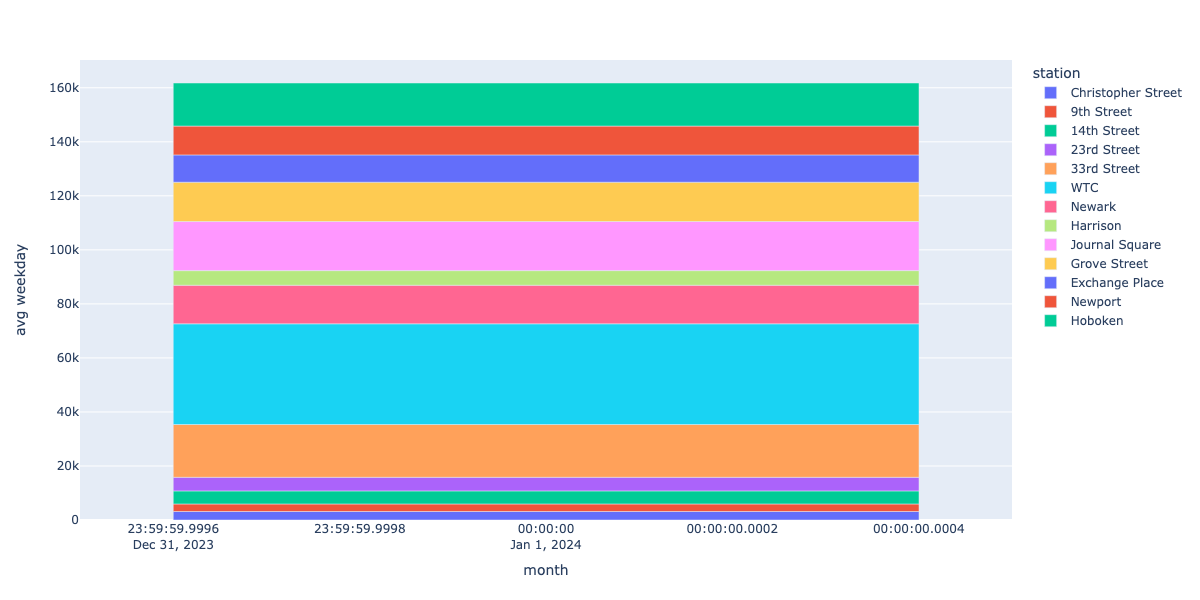

In [22]:
fig = px.bar(
    avgs[~avgs.station.str.contains('TOTAL')],
    x='month', y='avg weekday', color='station',
)
Image(fig.to_image(width=1200, height=600))